In [2]:
import pickle
from sports.annotators.soccer import draw_pitch, draw_points_on_pitch
from sports.configs.soccer import SoccerPitchConfiguration
import supervision as sv
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
def get_tracks(video_name):
    path = f'stubs/track_stubs_{video_name}.pkl'
    if not os.path.exists(path):
        raise(Exception(f"No tracks found for {video_name}"))
    
    with open(path, 'rb') as f:
        tracks = pickle.load(f)

        return tracks

In [152]:
tracks = get_tracks("08fd33_4")

In [5]:
def player_tracks_by_ids(tracks):
    player_tracks_by_ids = {}

    for frame_num, player_tracks in enumerate(tracks["players"]):
        for id, player_track in player_tracks.items():
            if id not in player_tracks_by_ids.keys():
                player_tracks_by_ids[id] = {}

            player_tracks_by_ids[id][frame_num] = player_track

    return player_tracks_by_ids


def remove_short_tracks(player_tracks: dict, threshold: int) -> dict:
    return {player_id: player_track for player_id, player_track in player_tracks.items() if len(player_track)>threshold}

In [154]:
player_tracks = player_tracks_by_ids(tracks)

In [155]:
long_tracks = remove_short_tracks(player_tracks, 20)

In [19]:
def get_transformed(player_track: dict):
    return [frame.get('position_transformed') for frame in player_track.values()]

In [157]:
long_tracks.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 20, 22, 23, 25, 68, 82, 88, 89, 90, 92, 99, 117, 123, 128, 129])

In [158]:
positions = get_transformed(long_tracks[2])

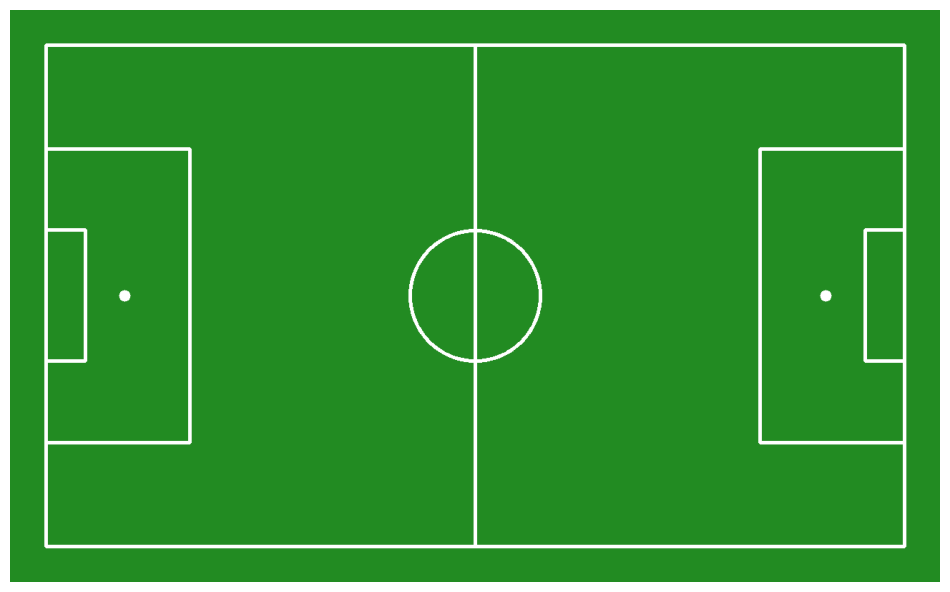

In [26]:
frame = draw_pitch(SoccerPitchConfiguration())
sv.plot_image(frame)

In [203]:
annotated = frame.copy()
annotated = draw_points_on_pitch(
    config=SoccerPitchConfiguration(),
    xy=np.array(positions),
    face_color=sv.Color.from_hex('00BFFF'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated
)

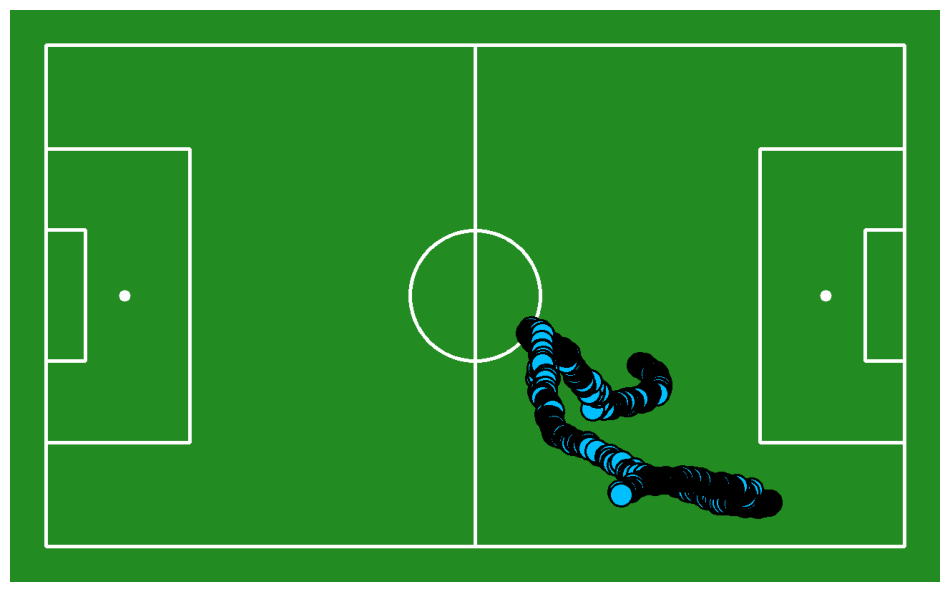

In [204]:
sv.plot_image(annotated)

In [259]:
annotated2 = frame.copy()
annotated2 = draw_points_on_pitch(
    config=SoccerPitchConfiguration(),
    xy=np.array([[5468,7122]]),
    face_color=sv.Color.from_hex('00BFFF'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated2
)

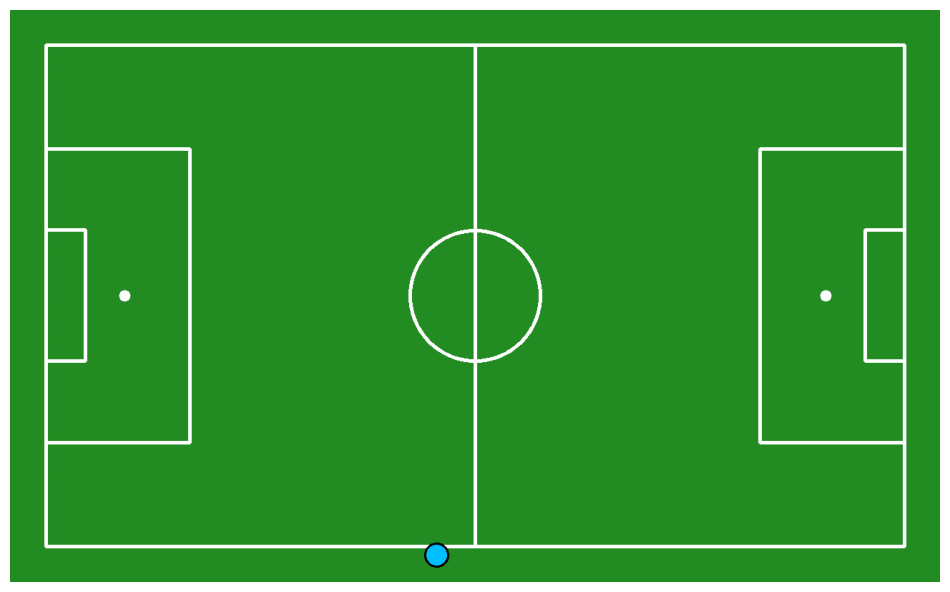

In [260]:
sv.plot_image(annotated2)

In [162]:
x = np.array([pos[0] for pos in positions])
y = np.array([pos[1] for pos in positions])

In [167]:
x = (x*0.1)+50
y = (y*0.1)+50

In [136]:
positions = np.array(positions)*0.1

In [137]:
len(positions)

740

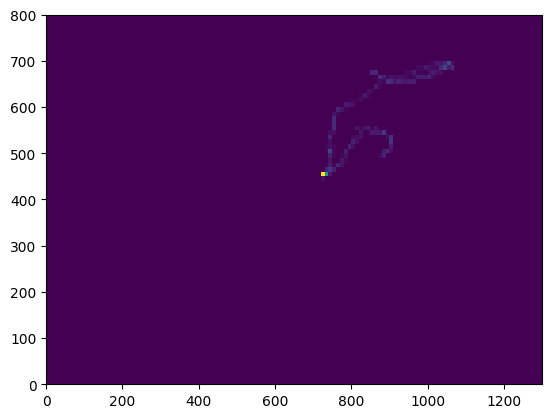

In [187]:
hist = plt.hist2d(x,y, bins=[np.arange(0,frame.shape[1]+1,10), np.arange(0,frame.shape[0]+1,10)], density=True)

In [188]:
Z, xedges, yedges = np.histogram2d(x, y)

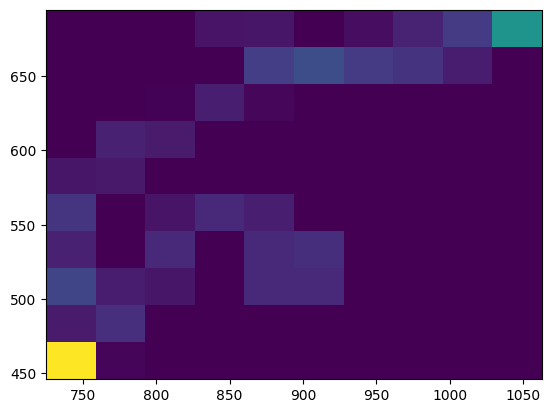

In [189]:
plt.pcolormesh(xedges, yedges, Z.T)

In [190]:
from scipy.stats import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[0:1300:x.size**0.5*1j,0:800:y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

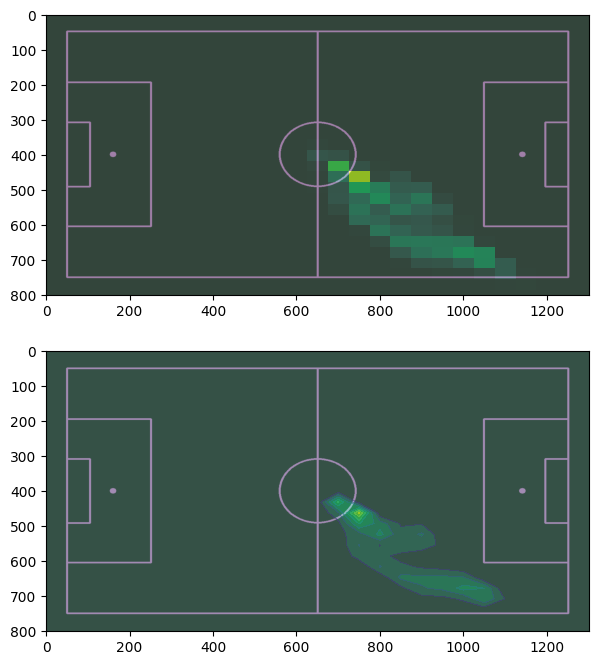

In [193]:
fig = plt.figure(figsize=(7,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# alpha=0.5 will make the plots semitransparent
ax1.pcolormesh(xi, yi, zi.reshape(xi.shape), alpha=0.5)
ax2.contourf(xi, yi, zi.reshape(xi.shape), alpha=0.5)

h,w,_ = frame.shape

ax1.set_xlim(0, w)
ax1.set_ylim(h, 0)
ax2.set_xlim(0, w)
ax2.set_ylim(h, 0)

im = frame.copy()
ax1.imshow(im, extent=[0, w, 0, h], aspect='auto')
ax2.imshow(im, extent=[0, w, 0, h], aspect='auto')

In [228]:
ball_tracks = tracks["ball"]

In [230]:
ball_transformed = np.array([ball_track.get(1).get('position_transformed') for ball_track in ball_tracks])

In [231]:
annotated3 = frame.copy()
annotated3 = draw_points_on_pitch(
    config=SoccerPitchConfiguration(),
    xy=ball_transformed,
    face_color=sv.Color.from_hex('00BFFF'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated3
)

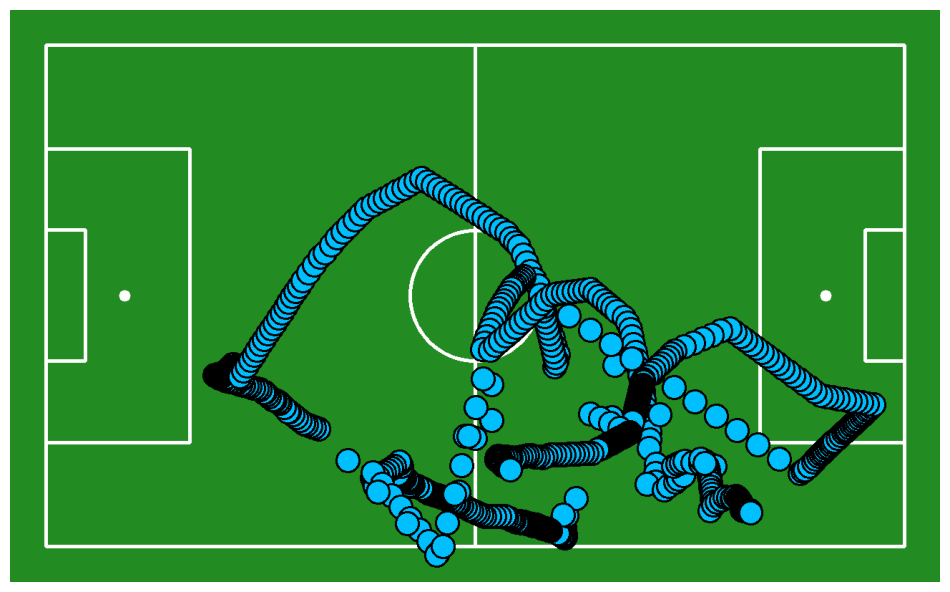

In [232]:
sv.plot_image(annotated3)

In [258]:
max(ball_transformed, key=lambda x: x[1])

array([5468.86181641, 7122.34912109])

In [4]:
levbor = get_tracks('LevBor-1stHalf')

In [6]:
levbor_player = player_tracks_by_ids(levbor)

In [8]:
long_levbor = remove_short_tracks(levbor_player, 50)

In [22]:
levbor_playerpos = get_transformed(long_levbor[1])

In [24]:
levbor_x = np.array([pos[0] for pos in levbor_playerpos])
levbor_y = np.array([pos[1] for pos in levbor_playerpos])

In [25]:
levbor_x = (levbor_x * 0.1) + 50
levbor_y = (levbor_y * 0.1) + 50

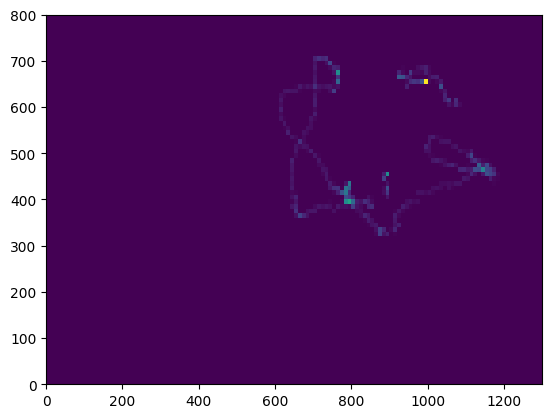

In [28]:
hist = plt.hist2d(levbor_x,levbor_y, bins=[np.arange(0,frame.shape[1]+1,10), np.arange(0,frame.shape[0]+1,10)], density=True)

In [29]:
from scipy.stats import gaussian_kde

k = gaussian_kde(np.vstack([levbor_x, levbor_y]))
xi, yi = np.mgrid[0:1300:levbor_x.size**0.5*1j,0:800:levbor_y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

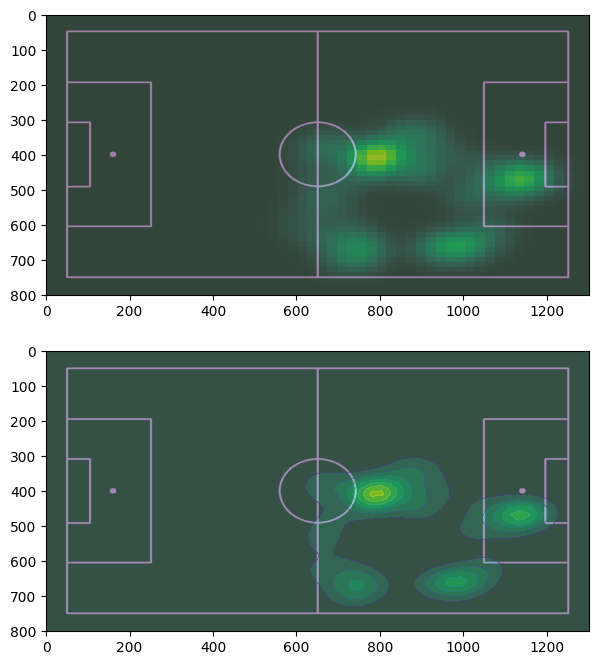

In [30]:
fig = plt.figure(figsize=(7,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# alpha=0.5 will make the plots semitransparent
ax1.pcolormesh(xi, yi, zi.reshape(xi.shape), alpha=0.5)
ax2.contourf(xi, yi, zi.reshape(xi.shape), alpha=0.5)

h,w,_ = frame.shape

ax1.set_xlim(0, w)
ax1.set_ylim(h, 0)
ax2.set_xlim(0, w)
ax2.set_ylim(h, 0)

im = frame.copy()
ax1.imshow(im, extent=[0, w, 0, h], aspect='auto')
ax2.imshow(im, extent=[0, w, 0, h], aspect='auto')